In [1]:
import pandas as pd
file= r'C:\Users\jimmy\OneDrive\Desktop\crossstitch\DMC.csv'
df=pd.read_csv(file)

#https://pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/



In [2]:
import webcolors

def rgb_to_hex(rgb_color):
    hex_color = webcolors.rgb_to_hex(rgb_color)
    return hex_color

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def overlay_grid(image, grid_size):
    height, width, _ = image.shape
    step_h = height // grid_size[0]
    step_w = width // grid_size[1]

    for i in range(0, height, step_h):
        cv2.line(image, (0, i), (width, i), (0, 0, 255), 1)

    for j in range(0, width, step_w):
        cv2.line(image, (j, 0), (j, height), (0, 0, 255), 1)

def identify_colors(image, grid_size):
    height, width, _ = image.shape
    step_h = height // grid_size[0]
    step_w = width // grid_size[1]

    colors = []

    for i in range(0, height, step_h):
        for j in range(0, width, step_w):
            color = np.mean(image[i:i+step_h, j:j+step_w], axis=(0, 1))
            colors.append(color)

    return colors

#could enumerate to get grid squares?

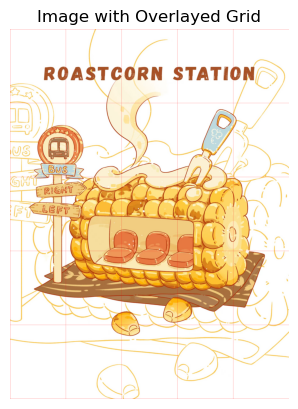

In [4]:
# Load the image
image_path = r'C:\Users\jimmy\OneDrive\Desktop\crossstitch\corn.jpg'
image = cv2.imread(image_path)

# Define the grid size (rows, columns)
grid_size = (5, 5)

# Overlay grid on the image
overlayed_image = image.copy()
overlay_grid(overlayed_image, grid_size)
# Identify colors within each grid cell
colors = identify_colors(image, grid_size)

# Display the overlayed image
plt.imshow(cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Overlayed Grid')
plt.axis('off')
plt.show()

cv2.destroyAllWindows()

In [5]:
df1=df.dropna(subset=['Red','Green','Blue'])
df1=df1[['Red','Green','Blue']].astype(int)
x=df1[['Red','Green','Blue']].values.tolist()

In [6]:
import numpy as np

def calculate_color_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

def match_color_to_list(random_color, color_list):
    min_distance = float('inf')
    matched_color = None
    
    for color in color_list:
        distance = calculate_color_distance(random_color, color)
        if distance < min_distance:
            min_distance = distance
            matched_color = color
    
    return matched_color


In [7]:
matched_colors=[]
for color in colors:
    matched=match_color_to_list(color,x)
    matched_colors.append(matched)
    
    

In [8]:
def hex_match(matched_colors):
    my_list=[]
    for color in matched_colors:
        my_list.append(rgb_to_hex(color).upper())
    return my_list

In [9]:
hex_colors=hex_match(matched_colors)

In [10]:
def dmc_threads(hex_colors):
    dmc_list=[]
    for hexc in hex_colors:
         dmc_list.append(df.loc[df['Hex Code'] == hexc])
    return dmc_list    

In [11]:
example=dmc_threads(hex_colors)
example

[     Color   DMC                  Floss Name Hex Code  Red  Green  Blue
 143    NaN  3756  Baby Blue Ultra Very Light  #EEFCFC  238    252   252,
      Color DMC    Floss Name Hex Code  Red  Green  Blue
 480    NaN  27  White Violet  #F0EEF9  240    238   249,
      Color  DMC             Floss Name Hex Code  Red  Green  Blue
 128    NaN  162  Blue Ultra Very Light  #DBECF5  219    236   245,
      Color DMC    Floss Name Hex Code  Red  Green  Blue
 480    NaN  27  White Violet  #F0EEF9  240    238   249,
      Color DMC    Floss Name Hex Code  Red  Green  Blue
 480    NaN  27  White Violet  #F0EEF9  240    238   249,
      Color   DMC      Floss Name Hex Code  Red  Green  Blue
 145    NaN  3841  Baby Blue Pale  #CDDFED  205    223   237,
      Color  DMC             Floss Name Hex Code  Red  Green  Blue
 128    NaN  162  Blue Ultra Very Light  #DBECF5  219    236   245,
      Color  DMC               Floss Name Hex Code  Red  Green  Blue
 169    NaN  747  Peacock Blue Very Light  #E5